## Our goal
* Is to suggest a suitable crop which will yield the most
* Find the best regressor for finding the most yielding crop
* Find the best classifier which will suggest the crop

# NB
## Problems:
* To work with regressors a huge amount of dataset is needed
* The dataset I am working on contains less than 100 information
* That's why the models couldn't learn enough to predict accurately

# Importing Libraries

In [1]:
from importlib import import_module
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#importing oneHotEncoder and column transformer for converting text to numeric data and transforming the columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing all the regressors

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

# Importing dataset and creating X and y's for training and testing

In [3]:
agds = pd.read_csv("data/agriculturalDataset.csv")
agds["area"].fillna(agds["area"].mean(),
                                     inplace=True)

X = agds.drop(["aus", "aman", "boro", "wheat", "potato", "jute"], axis = 1)
aus_y = agds["aus"]
aman_y = agds["aman"]
boro_y = agds["boro"]
wheat_y = agds["wheat"]
potato_y = agds["potato"]
jute_y = agds["jute"]

# Transforming columns which holds string values

In [4]:
#transforming our dataframe cells which have text values, converting them to numbers
categorical_features = ["District", "storm"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)

# Create Train and Test data
## List of target
* Aus
* Aman
* Boro
* Wheat
* Potato
* Jute

In [5]:
#Creating train data and test data

aus_X_train, aus_X_test, aus_y_train, aus_y_test = train_test_split(transformed_X, aus_y, test_size=0.2)
aman_X_train, aman_X_test, aman_y_train, aman_y_test = train_test_split(transformed_X, aman_y, test_size=0.2)
boro_X_train, boro_X_test, boro_y_train, boro_y_test = train_test_split(transformed_X, boro_y, test_size=0.2)
wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test = train_test_split(transformed_X, wheat_y, test_size=0.2)
potato_X_train, potato_X_test, potato_y_train, potato_y_test = train_test_split(transformed_X, potato_y, test_size=0.2)
jute_X_train, jute_X_test, jute_y_train, jute_y_test = train_test_split(transformed_X, jute_y, test_size=0.2)

# Creating a dictionary of models
## Result for each target
### Execution time for each taeget

In [6]:
models = {"RandomForestRegressor": RandomForestRegressor(),
         "KNeighborsRegressor": KNeighborsRegressor(),
         "GradientBoostingRegressor": GradientBoostingRegressor(),
         "AdaBoostRegressor": AdaBoostRegressor(),
         "DecisionTreeRegressor": DecisionTreeRegressor()}

accuracy = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}

exec_time = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}
models, accuracy, exec_time

({'RandomForestRegressor': RandomForestRegressor(),
  'KNeighborsRegressor': KNeighborsRegressor(),
  'GradientBoostingRegressor': GradientBoostingRegressor(),
  'AdaBoostRegressor': AdaBoostRegressor(),
  'DecisionTreeRegressor': DecisionTreeRegressor()},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}})

# Function to get accuracy score and Execution time

In [7]:
def trainTestEx(models, X_train, X_test, y_train, y_test, name):
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    exec_time[name][model_name] = (end_time - start_time)
    accuracy[name][model_name] = model.score(X_test, y_test)

# Function to plot Accuracy comparison bar

In [8]:
def accuracyDataFrame(resultOfAccuracy, name):
  dataframe_of_aus_accuracy_result = pd.DataFrame(resultOfAccuracy.values(),
                          resultOfAccuracy.keys(),
                          columns=["Accuracy for {}".format(name)])
  dataframe_of_aus_accuracy_result.plot.bar();

# Function to plot Execution comparison bar

In [9]:
def executionDataFrame(resultOfexecution, name):
  dataframe_of_aus_execution_result = pd.DataFrame(resultOfexecution.values(),
                          resultOfexecution.keys(),
                          columns=["Excecution for {}".format(name)])
  dataframe_of_aus_execution_result.plot.bar();

# Training and Testing models (Aus)

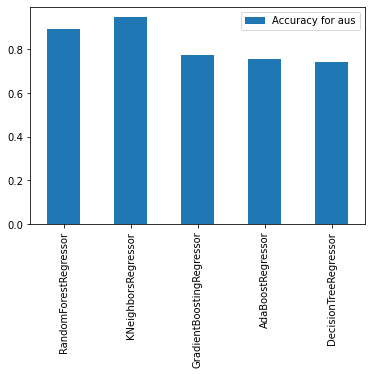

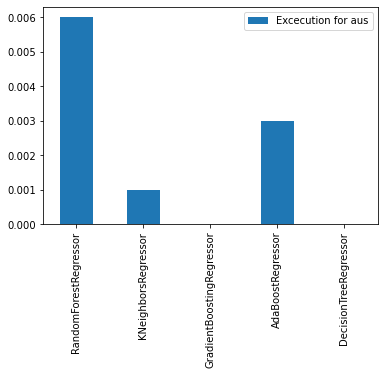

In [10]:
name = "aus"

trainTestEx(models, aus_X_train, aus_X_test, aus_y_train, aus_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Aman)

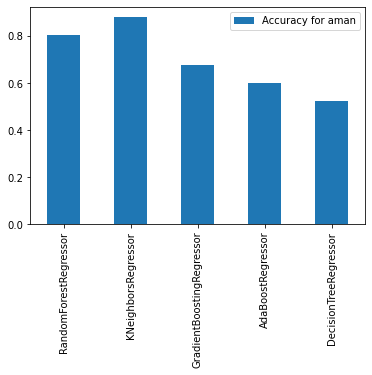

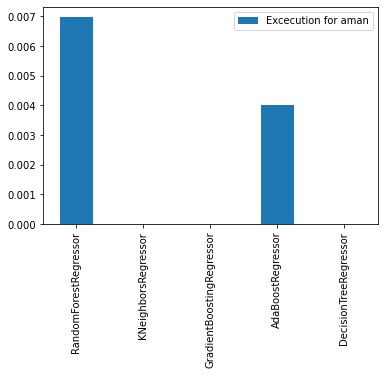

In [11]:
name = "aman"

trainTestEx(models, aman_X_train, aman_X_test, aman_y_train, aman_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Boro)

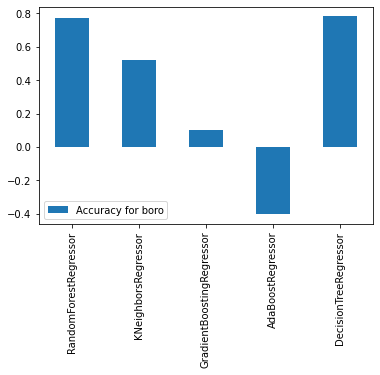

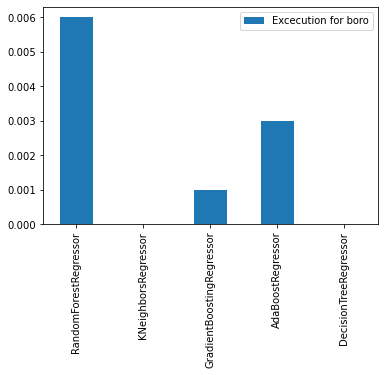

In [12]:
name = "boro"

trainTestEx(models, boro_X_train, boro_X_test, boro_y_train, boro_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Wheat)

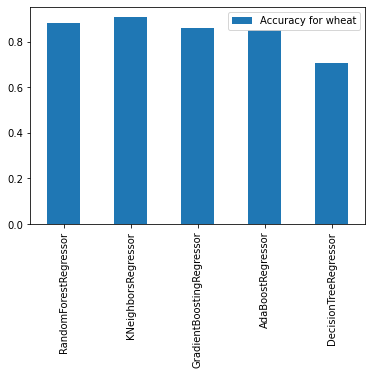

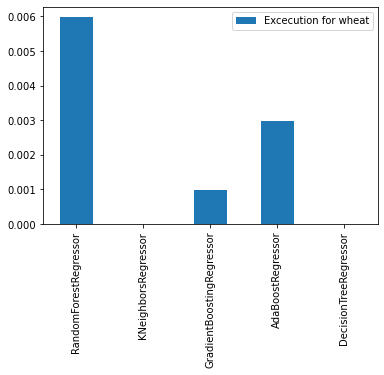

In [13]:
name = "wheat"

trainTestEx(models, wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Potato)

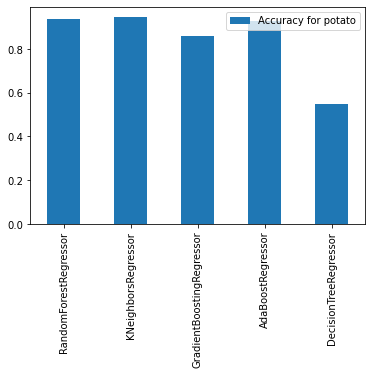

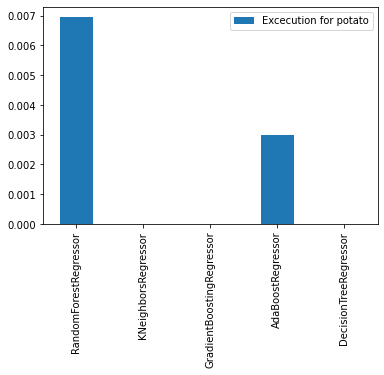

In [14]:
name = "potato"

trainTestEx(models, potato_X_train, potato_X_test, potato_y_train, potato_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Jute)

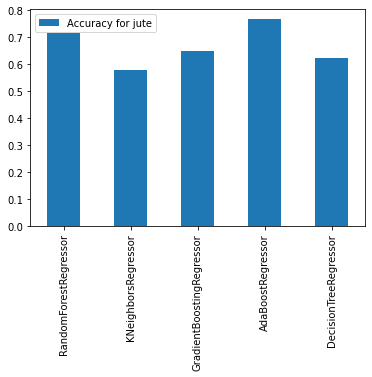

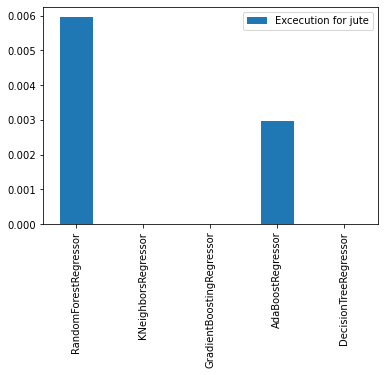

In [15]:
name = "jute"

trainTestEx(models, jute_X_train, jute_X_test, jute_y_train, jute_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Mean Absolute Error for target (aus) is calculated

In [16]:
from sklearn.metrics import mean_absolute_error

prediction_rfc_aus = models["RandomForestRegressor"].fit(aus_X_train, aus_y_train)
prediction_knc_aus = models["KNeighborsRegressor"].fit(aus_X_train, aus_y_train)
prediction_gbr_aus = models["GradientBoostingRegressor"].fit(aus_X_train, aus_y_train)
prediction_abr_aus = models["AdaBoostRegressor"].fit(aus_X_train, aus_y_train)
prediction_dtr_aus = models["DecisionTreeRegressor"].fit(aus_X_train, aus_y_train)

prediction_rfc_aus = models["RandomForestRegressor"].predict(aus_X_test)
prediction_knc_aus = models["KNeighborsRegressor"].predict(aus_X_test)
prediction_gbr_aus = models["GradientBoostingRegressor"].predict(aus_X_test)
prediction_abr_aus = models["AdaBoostRegressor"].predict(aus_X_test)
prediction_dtr_aus = models["DecisionTreeRegressor"].predict(aus_X_test)

mae_rfc_aus = mean_absolute_error(aus_y_test, prediction_rfc_aus)
mae_knc_aus = mean_absolute_error(aus_y_test, prediction_knc_aus)
mae_gbr_aus = mean_absolute_error(aus_y_test, prediction_gbr_aus)
mae_abr_aus = mean_absolute_error(aus_y_test, prediction_abr_aus)
mae_dtr_aus = mean_absolute_error(aus_y_test, prediction_dtr_aus)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_aus))
print("Mean Absolute Error of knc: {}".format(mae_knc_aus))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_aus))
print("Mean Absolute Error of abr: {}".format(mae_abr_aus))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_aus))

Mean Absolute Error of rfc: 2988.155
Mean Absolute Error of knc: 2114.4142857142856
Mean Absolute Error of gbr: 4362.227016119262
Mean Absolute Error of abr: 4187.1724752093005
Mean Absolute Error of dtr: 4082.9285714285716


# Showing the comaparison using DataFrame

In [17]:
com_aus_df = pd.DataFrame(data={"Actual value": aus_y_test,
                                   "predicted value of rfc": prediction_rfc_aus,
                                   "predicted value of knc": prediction_knc_aus,
                                   "predicted value of gbr": prediction_gbr_aus,
                                   "predicted value of abr": prediction_abr_aus,
                                   "predicted value of dtr": prediction_dtr_aus,})

com_aus_df

,Actual value,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
19,71548,87298.77,77386.2,102950.687526,105097.608696,103901.0
60,1282,823.81,933.8,1086.351264,1026.500000,865.0
46,2129,1062.25,933.8,5827.732882,1021.272727,1545.0
11,1163,998.48,933.8,1769.862104,1027.000000,1545.0
4,447,965.34,933.8,877.066352,1081.571429,709.0
27,45441,48709.48,42949.0,38461.999428,43685.714286,33830.0
35,752,960.25,1323.2,1289.920387,1167.384615,1413.0
30,609,680.75,488.6,668.613274,1026.500000,383.0
63,1407,1294.80,1235.0,1353.449464,1183.294118,1431.0
18,907,824.43,933.8,4787.727962,1081.571429,1545.0


# Yielding result for test set 
* Target (Aus)
* The test cases will be compared later
* If you want to change test data set than comment our np.random.seed line

# Should only calculate for the algo which has less error

In [18]:
np.random.seed(3)

test_arr = np.random.randint(500, 100000, (1,45))

### Random Forest regressor

In [19]:
np.random.seed(3)

models["RandomForestRegressor"].fit(aus_X_train, aus_y_train)
test_predict_aus_rfc = float(models["RandomForestRegressor"].predict(test_arr))
test_predict_aus_rfc

6510.44

### KNeighbors Regressor

In [20]:
np.random.seed(3)

models["KNeighborsRegressor"].fit(aus_X_train, aus_y_train)
test_predict_aus_knc = float(models["KNeighborsRegressor"].predict(test_arr))
test_predict_aus_knc

984.2

### Gradient Boosting Regressor
* In our case this algo gives us more accurate result comparing with others

In [21]:
np.random.seed(3)

models["GradientBoostingRegressor"].fit(aus_X_train, aus_y_train)
test_predict_aus_gbr = float(models["GradientBoostingRegressor"].predict(test_arr))
yield_for_aus = test_predict_aus_gbr

yield_for_aus

10195.984175769298

### Ada Boost Regressor

In [22]:
np.random.seed(3)

models["AdaBoostRegressor"].fit(aus_X_train, aus_y_train)
test_predict_aus_abr = float(models["AdaBoostRegressor"].predict(test_arr))
test_predict_aus_abr

33845.0

### DecisionTree Regressor

In [23]:
np.random.seed(3)

models["DecisionTreeRegressor"].fit(aus_X_train, aus_y_train)
test_predict_aus_dtr = float(models["DecisionTreeRegressor"].predict(test_arr))
test_predict_aus_dtr

6324.0

# Mean Absolute Error for target (Aman) is calculated
## In this section we will only test with the algorithm that has lowest MAE

In [24]:
from sklearn.metrics import mean_absolute_error

prediction_rfc_aman = models["RandomForestRegressor"].fit(aman_X_train, aman_y_train)
prediction_knc_aman = models["KNeighborsRegressor"].fit(aman_X_train, aman_y_train)
prediction_gbr_aman = models["GradientBoostingRegressor"].fit(aman_X_train, aman_y_train)
prediction_abr_aman = models["AdaBoostRegressor"].fit(aman_X_train, aman_y_train)
prediction_dtr_aman = models["DecisionTreeRegressor"].fit(aman_X_train, aman_y_train)

prediction_rfc_aman = models["RandomForestRegressor"].predict(aman_X_test)
prediction_knc_aman = models["KNeighborsRegressor"].predict(aman_X_test)
prediction_gbr_aman = models["GradientBoostingRegressor"].predict(aman_X_test)
prediction_abr_aman = models["AdaBoostRegressor"].predict(aman_X_test)
prediction_dtr_aman = models["DecisionTreeRegressor"].predict(aman_X_test)

mae_rfc_aman = mean_absolute_error(aman_y_test, prediction_rfc_aman)
mae_knc_aman = mean_absolute_error(aman_y_test, prediction_knc_aman)
mae_gbr_aman = mean_absolute_error(aman_y_test, prediction_gbr_aman)
mae_abr_aman = mean_absolute_error(aman_y_test, prediction_abr_aman)
mae_dtr_aman = mean_absolute_error(aman_y_test, prediction_dtr_aman)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_aman))
print("Mean Absolute Error of knc: {}".format(mae_knc_aman))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_aman))
print("Mean Absolute Error of abr: {}".format(mae_abr_aman))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_aman))

Mean Absolute Error of rfc: 29190.958571428575
Mean Absolute Error of knc: 29023.885714285716
Mean Absolute Error of gbr: 40456.43020320621
Mean Absolute Error of abr: 39107.67548403977
Mean Absolute Error of dtr: 44867.57142857143


# Showing the comaparison using DataFrame

In [25]:
com_aman_df = pd.DataFrame(data={"Actual value Aman": aman_y_test,
                                   "predicted value of rfc": prediction_rfc_aman,
                                   "predicted value of knc": prediction_knc_aman,
                                   "predicted value of gbr": prediction_gbr_aman,
                                   "predicted value of abr": prediction_abr_aman,
                                   "predicted value of dtr": prediction_dtr_aman,})

com_aman_df

,Actual value Aman,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
48,175719,350083.59,283363.2,419089.417020,479799.000000,501047.0
62,202701,242700.15,303430.4,329411.793292,231345.761905,140425.0
32,266992,269479.59,256447.8,268787.696794,252525.750000,285921.0
29,116994,107940.51,109613.2,115295.381348,111754.600000,101542.0
21,26151,22842.58,26689.4,29459.348493,20944.500000,28872.0
51,91527,90305.85,91739.2,96163.480206,103619.750000,89870.0
60,277697,272663.19,256447.8,259941.066862,250360.000000,285921.0
16,109773,94242.69,94806.8,94676.785099,104250.250000,107112.0
18,250758,266505.68,256447.8,264516.604443,244348.166667,232731.0
67,262172,283164.26,256447.8,284275.692294,251841.250000,241394.0


### Random Forest Algorithm
* In our case this algo gives us more accurate result comparing with others

In [26]:
np.random.seed(3)

models["RandomForestRegressor"].fit(aman_X_train, aman_y_train)
test_predict_aman_rfc = float(models["RandomForestRegressor"].predict(test_arr))

yield_for_aman = test_predict_aman_rfc
yield_for_aman

233930.07

# Mean Absolute Error for target (Boro) is calculated
## In this section we will only test with the algorithm that has lowest MAE

In [27]:
from sklearn.metrics import mean_absolute_error

np.random.seed(0)

prediction_rfc_boro = models["RandomForestRegressor"].fit(boro_X_train, boro_y_train)
prediction_knc_boro = models["KNeighborsRegressor"].fit(boro_X_train, boro_y_train)
prediction_gbr_boro = models["GradientBoostingRegressor"].fit(boro_X_train, boro_y_train)
prediction_abr_boro = models["AdaBoostRegressor"].fit(boro_X_train, boro_y_train)
prediction_dtr_boro = models["DecisionTreeRegressor"].fit(boro_X_train, boro_y_train)

prediction_rfc_boro = models["RandomForestRegressor"].predict(boro_X_test)
prediction_knc_boro = models["KNeighborsRegressor"].predict(boro_X_test)
prediction_gbr_boro = models["GradientBoostingRegressor"].predict(boro_X_test)
prediction_abr_boro = models["AdaBoostRegressor"].predict(boro_X_test)
prediction_dtr_boro = models["DecisionTreeRegressor"].predict(boro_X_test)

mae_rfc_boro = mean_absolute_error(boro_y_test, prediction_rfc_boro)
mae_knc_boro = mean_absolute_error(boro_y_test, prediction_knc_boro)
mae_gbr_boro = mean_absolute_error(boro_y_test, prediction_gbr_boro)
mae_abr_boro = mean_absolute_error(boro_y_test, prediction_abr_boro)
mae_dtr_boro = mean_absolute_error(boro_y_test, prediction_dtr_boro)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_boro))
print("Mean Absolute Error of knc: {}".format(mae_knc_boro))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_boro))
print("Mean Absolute Error of abr: {}".format(mae_abr_boro))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_boro))

Mean Absolute Error of rfc: 58496.665
Mean Absolute Error of knc: 77363.84285714287
Mean Absolute Error of gbr: 76172.70665476882
Mean Absolute Error of abr: 73071.0484658199
Mean Absolute Error of dtr: 77558.64285714286


# Showing the comaparison using DataFrame

In [28]:
com_boro_df = pd.DataFrame(data={"Actual value boro": boro_y_test,
                                   "predicted value of rfc": prediction_rfc_boro,
                                   "predicted value of knc": prediction_knc_boro,
                                   "predicted value of gbr": prediction_gbr_boro,
                                   "predicted value of abr": prediction_abr_boro,
                                   "predicted value of dtr": prediction_dtr_boro,})

com_boro_df

,Actual value boro,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
55,713696,939083.06,1112956.2,8.042870e+05,7.006508e+05,682506.0
42,200560,212899.81,215979.8,2.116720e+05,2.162584e+05,211933.0
60,725634,753082.53,664853.0,6.922076e+05,6.962902e+05,700906.0
49,205638,216305.69,211265.0,2.204626e+05,2.184935e+05,203305.0
50,231718,243966.85,225738.2,2.409952e+05,2.341860e+05,247999.0
69,503363,884789.69,959517.2,1.251090e+06,1.343510e+06,1343510.0
64,223605,232105.67,232453.0,2.410946e+05,2.266947e+05,228161.0
53,729912,746149.77,667945.8,7.592566e+05,6.991085e+05,700906.0
32,658508,666180.87,667945.8,6.533384e+05,6.814238e+05,658469.0
45,117576,109219.70,109140.0,1.076667e+05,1.182180e+05,99814.0


### Ada Boosting Regressor Algorithm
* In our case this algo gives us more accurate result comparing with others

In [29]:
np.random.seed(3)

models["AdaBoostRegressor"].fit(boro_X_train, boro_y_train)
test_predict_boro_abr = float(models["AdaBoostRegressor"].predict(test_arr))

yield_for_boro = test_predict_boro_abr
yield_for_boro

698424.6666666666

# Mean Absolute Error for target (Wheat) is calculated
## In this section we will only test with the algorithm that has lowest MAE

In [30]:
from sklearn.metrics import mean_absolute_error

np.random.seed(0)

prediction_rfc_wheat = models["RandomForestRegressor"].fit(wheat_X_train, wheat_y_train)
prediction_knc_wheat = models["KNeighborsRegressor"].fit(wheat_X_train, wheat_y_train)
prediction_gbr_wheat = models["GradientBoostingRegressor"].fit(wheat_X_train, wheat_y_train)
prediction_abr_wheat = models["AdaBoostRegressor"].fit(wheat_X_train, wheat_y_train)
prediction_dtr_wheat = models["DecisionTreeRegressor"].fit(wheat_X_train, wheat_y_train)

prediction_rfc_wheat = models["RandomForestRegressor"].predict(wheat_X_test)
prediction_knc_wheat = models["KNeighborsRegressor"].predict(wheat_X_test)
prediction_gbr_wheat = models["GradientBoostingRegressor"].predict(wheat_X_test)
prediction_abr_wheat = models["AdaBoostRegressor"].predict(wheat_X_test)
prediction_dtr_wheat = models["DecisionTreeRegressor"].predict(wheat_X_test)

mae_rfc_wheat = mean_absolute_error(wheat_y_test, prediction_rfc_wheat)
mae_knc_wheat = mean_absolute_error(wheat_y_test, prediction_knc_wheat)
mae_gbr_wheat = mean_absolute_error(wheat_y_test, prediction_gbr_wheat)
mae_abr_wheat = mean_absolute_error(wheat_y_test, prediction_abr_wheat)
mae_dtr_wheat = mean_absolute_error(wheat_y_test, prediction_dtr_wheat)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_wheat))
print("Mean Absolute Error of knc: {}".format(mae_knc_wheat))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_wheat))
print("Mean Absolute Error of abr: {}".format(mae_abr_wheat))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_wheat))

Mean Absolute Error of rfc: 1442.0557142857144
Mean Absolute Error of knc: 1295.6571428571426
Mean Absolute Error of gbr: 1486.3515113868464
Mean Absolute Error of abr: 1754.9226740211136
Mean Absolute Error of dtr: 2453.0714285714284


# Showing the comaparison using DataFrame

In [31]:
com_wheat_df = pd.DataFrame(data={"Actual value wheat": wheat_y_test,
                                   "predicted value of rfc": prediction_rfc_wheat,
                                   "predicted value of knc": prediction_knc_wheat,
                                   "predicted value of gbr": prediction_gbr_wheat,
                                   "predicted value of abr": prediction_abr_wheat,
                                   "predicted value of dtr": prediction_dtr_wheat,})

com_wheat_df

,Actual value wheat,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
20,10363,5444.58,6161.4,5182.729432,3481.571429,742.0
55,2525,6064.37,4906.2,6030.590992,6279.782609,9154.0
46,17153,15734.04,15618.8,16296.416073,15515.000000,15058.0
64,125,353.78,344.0,219.487584,726.937500,273.0
37,2363,1071.23,1408.0,531.948865,1245.043478,811.0
18,12678,15522.62,15618.8,16545.252190,16290.833333,17477.0
53,15893,16131.58,15618.8,16800.271989,16599.500000,15058.0
9,2788,2227.09,1032.2,2211.744688,2189.120000,2073.0
56,657,819.64,967.2,916.136114,823.846154,2597.0
69,3041,6586.53,5787.0,5436.278758,6449.000000,5473.0


### KNeighbors Regressor Algorithm
* In our case this algo gives us more accurate result comparing with others

In [32]:
np.random.seed(3)

models["KNeighborsRegressor"].fit(wheat_X_train, wheat_y_train)
test_predict_wheat_abr = float(models["KNeighborsRegressor"].predict(test_arr))

yield_for_wheat = test_predict_wheat_abr
yield_for_wheat

2480.0

# Mean Absolute Error for target (Potato) is calculated
## In this section we will only test with the algorithm that has lowest MAE

In [33]:
from sklearn.metrics import mean_absolute_error

np.random.seed(0)

prediction_rfc_potato = models["RandomForestRegressor"].fit(potato_X_train, potato_y_train)
prediction_knc_potato = models["KNeighborsRegressor"].fit(potato_X_train, potato_y_train)
prediction_gbr_potato = models["GradientBoostingRegressor"].fit(potato_X_train, potato_y_train)
prediction_abr_potato = models["AdaBoostRegressor"].fit(potato_X_train, potato_y_train)
prediction_dtr_potato = models["DecisionTreeRegressor"].fit(potato_X_train, potato_y_train)

prediction_rfc_potato = models["RandomForestRegressor"].predict(potato_X_test)
prediction_knc_potato = models["KNeighborsRegressor"].predict(potato_X_test)
prediction_gbr_potato = models["GradientBoostingRegressor"].predict(potato_X_test)
prediction_abr_potato = models["AdaBoostRegressor"].predict(potato_X_test)
prediction_dtr_potato = models["DecisionTreeRegressor"].predict(potato_X_test)

mae_rfc_potato = mean_absolute_error(potato_y_test, prediction_rfc_potato)
mae_knc_potato = mean_absolute_error(potato_y_test, prediction_knc_potato)
mae_gbr_potato = mean_absolute_error(potato_y_test, prediction_gbr_potato)
mae_abr_potato = mean_absolute_error(potato_y_test, prediction_abr_potato)
mae_dtr_potato = mean_absolute_error(potato_y_test, prediction_dtr_potato)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_potato))
print("Mean Absolute Error of knc: {}".format(mae_knc_potato))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_potato))
print("Mean Absolute Error of abr: {}".format(mae_abr_potato))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_potato))

Mean Absolute Error of rfc: 3455.9585714285718
Mean Absolute Error of knc: 3032.100000000001
Mean Absolute Error of gbr: 3974.4046662172827
Mean Absolute Error of abr: 4472.480982823394
Mean Absolute Error of dtr: 7367.571428571428


# Showing the comaparison using DataFrame

In [34]:
com_potato_df = pd.DataFrame(data={"Actual value potato": potato_y_test,
                                   "predicted value of rfc": prediction_rfc_potato,
                                   "predicted value of knc": prediction_knc_potato,
                                   "predicted value of gbr": prediction_gbr_potato,
                                   "predicted value of abr": prediction_abr_potato,
                                   "predicted value of dtr": prediction_dtr_potato,})

com_potato_df

,Actual value potato,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
28,41564,42685.70,42332.8,40304.557434,42318.281250,40571.0
50,3335,4114.91,3892.0,4377.121007,10082.625000,3749.0
49,51989,42822.42,42504.2,45806.684725,42112.450000,43888.0
20,56592,50697.91,50627.8,54542.255408,51072.074074,58910.0
62,52557,51646.58,51993.0,55587.369888,51072.074074,52907.0
40,35094,32551.69,34899.4,35009.480639,32174.692308,16960.0
45,65423,76146.66,69611.0,80605.038415,72446.000000,96256.0
33,38005,37000.95,39564.4,40885.882954,41210.000000,29029.0
60,48956,41372.39,40542.0,45755.338658,40585.619048,41555.0
36,3353,4085.18,4025.4,6561.183451,10306.000000,3646.0


### Random Forest Regressor
* In our case this algo gives us more accurate result comparing with others

In [35]:
np.random.seed(3)

models["RandomForestRegressor"].fit(potato_X_train, potato_y_train)
test_predict_potato_rfc = float(models["RandomForestRegressor"].predict(test_arr))

yield_for_potato = test_predict_potato_rfc
yield_for_potato

33936.73

# Mean Absolute Error for target (Jute) is calculated
## In this section we will only test with the algorithm that has lowest MAE

In [36]:
from sklearn.metrics import mean_absolute_error

np.random.seed(0)

prediction_rfc_jute = models["RandomForestRegressor"].fit(jute_X_train, jute_y_train)
prediction_knc_jute = models["KNeighborsRegressor"].fit(jute_X_train, jute_y_train)
prediction_gbr_jute = models["GradientBoostingRegressor"].fit(jute_X_train, jute_y_train)
prediction_abr_jute = models["AdaBoostRegressor"].fit(jute_X_train, jute_y_train)
prediction_dtr_jute = models["DecisionTreeRegressor"].fit(jute_X_train, jute_y_train)

prediction_rfc_jute = models["RandomForestRegressor"].predict(jute_X_test)
prediction_knc_jute = models["KNeighborsRegressor"].predict(jute_X_test)
prediction_gbr_jute = models["GradientBoostingRegressor"].predict(jute_X_test)
prediction_abr_jute = models["AdaBoostRegressor"].predict(jute_X_test)
prediction_dtr_jute = models["DecisionTreeRegressor"].predict(jute_X_test)

mae_rfc_jute = mean_absolute_error(jute_y_test, prediction_rfc_jute)
mae_knc_jute = mean_absolute_error(jute_y_test, prediction_knc_jute)
mae_gbr_jute = mean_absolute_error(jute_y_test, prediction_gbr_jute)
mae_abr_jute = mean_absolute_error(jute_y_test, prediction_abr_jute)
mae_dtr_jute = mean_absolute_error(jute_y_test, prediction_dtr_jute)

print("Mean Absolute Error of rfc: {}".format(mae_rfc_jute))
print("Mean Absolute Error of knc: {}".format(mae_knc_jute))
print("Mean Absolute Error of gbr: {}".format(mae_gbr_jute))
print("Mean Absolute Error of abr: {}".format(mae_abr_jute))
print("Mean Absolute Error of dtr: {}".format(mae_dtr_jute))

Mean Absolute Error of rfc: 12753.313571428573
Mean Absolute Error of knc: 14317.971428571427
Mean Absolute Error of gbr: 13963.28844918242
Mean Absolute Error of abr: 14258.789369256474
Mean Absolute Error of dtr: 13584.42857142857


# Showing the comaparison using DataFrame

In [37]:
com_jute_df = pd.DataFrame(data={"Actual value jute": jute_y_test,
                                   "predicted value of rfc": prediction_rfc_jute,
                                   "predicted value of knc": prediction_knc_jute,
                                   "predicted value of gbr": prediction_gbr_jute,
                                   "predicted value of abr": prediction_abr_jute,
                                   "predicted value of dtr": prediction_dtr_jute,})

com_jute_df

,Actual value jute,predicted value of rfc,predicted value of knc,predicted value of gbr,predicted value of abr,predicted value of dtr
19,39786,62740.74,81868.2,73056.519427,69960.000000,37272.0
30,52187,41098.11,38884.2,37486.710509,37248.000000,37248.0
54,67001,79595.75,61775.4,72694.562821,80027.833333,77949.0
15,10338,10263.93,11842.6,11735.272279,13060.750000,10458.0
50,12378,11302.14,12761.4,9475.474287,13542.444444,10458.0
23,64371,39384.52,38370.6,37918.080660,37733.666667,38814.0
41,127486,97711.24,108727.4,112360.690475,106634.421053,152952.0
43,13464,11009.39,13400.8,12773.522028,12800.900000,6465.0
10,2430,3763.90,3034.4,4704.685873,10816.500000,4153.0
56,54177,64384.58,57941.4,62233.723293,63947.833333,67453.0


### KNeighbors Regressor Algorithm
* In our case this algo gives us more accurate result comparing with others

In [38]:
np.random.seed(3)

models["KNeighborsRegressor"].fit(jute_X_train, jute_y_train)
test_predict_jute_abr = float(models["KNeighborsRegressor"].predict(test_arr))

yield_for_jute = test_predict_jute_abr
yield_for_jute

3402.4

In [39]:
yield_for_aus, yield_for_aman, yield_for_boro, yield_for_wheat, yield_for_potato, yield_for_jute

(10195.984175769298, 233930.07, 698424.6666666666, 2480.0, 33936.73, 3402.4)

In [40]:
result = {"yield_for_aus": yield_for_aus,
         "yield_for_aman": yield_for_aman,
         "yield_for_boro": yield_for_boro,
         "yield_for_wheat": yield_for_wheat,
         "yield_for_potato": yield_for_potato,
         "yield_for_jute": yield_for_jute}
result

{'yield_for_aus': 10195.984175769298,
 'yield_for_aman': 233930.07,
 'yield_for_boro': 698424.6666666666,
 'yield_for_wheat': 2480.0,
 'yield_for_potato': 33936.73,
 'yield_for_jute': 3402.4}

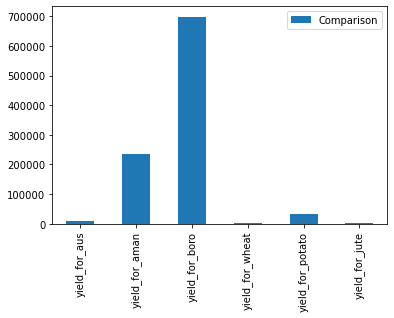

In [41]:
dataframe_of_aus_accuracy_result = pd.DataFrame(result.values(),
                          result.keys(),
                          columns=["Comparison"])
dataframe_of_aus_accuracy_result.plot.bar();

# As we can see that Boro is yielding the most for given dataset
* We will suggest Boro for that land